Частина 1

In [61]:
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
import numpy as np

1. Створіть графік (scatter plot) для даних ірисів (iris dataset), де:
Вісь X (x-axis) відповідає ширині чашелистика (sepal width).
Вісь Y (y-axis) відповідає довжині чашелистика (sepal length).
Кожен пункт на графіку має розмір, який залежить від довжини пелюстки (petal length).
Кожен пункт на графіку має різний колір в залежності від виду (species).
При наведенні на пункт повинні відображатися додаткові дані, такі як ширина пелюстки (petal width).

In [46]:
df = pd.read_csv('Iris.csv', encoding = 'latin-1')

plt.figure(figsize=(8, 6))

fig = px.scatter(df,
                 x = "SepalLengthCm",
                 y = "SepalWidthCm",
                 color = "Species",
                 title = "Scatter Plot of Sepal Length vs Sepal Width",
                 labels = {"sepal_length": "Sepal Length (cm)", "sepal_width": "Sepal Width (cm)"})

fig.update_traces(marker = dict(size=10),
                  selector = dict(mode = 'markers'))

fig.update_layout(coloraxis = dict(colorscale = 'Viridis'))

fig.show()

<Figure size 800x600 with 0 Axes>

2. Створіть розподільчий графік (scatter plot) для даних про кількість медалей, де:
Вісь Y (y-axis) відповідає нації (nation), яка отримала медалі.
Вісь X (x-axis) відповідає загальній кількості медалей, отриманих кожною нацією.
Кожен пункт на графіку має різний колір в залежності від типу медалі (medal).
Кожен пункт на графіку має різний символ в залежності від типу медалі (medal).
Розмір кожного маркера на графіку встановлено на значення 10.

In [47]:
data = px.data.medals_long()

fig.update_traces(marker_size = 10)
fig = px.scatter(
    data,
    x='count',
    y='nation',
    color='medal',
    symbol='medal')

fig.update_layout(
    title='Scatter Plot of Total Medals by Nation',
    xaxis_title='Total Medals',
    yaxis_title='Nation')

fig.show()

3. Створіть графік (scatter plot) для даних про рахунки та чайові в ресторані, де:
Вісь X (x-axis) відповідає загальній сумі рахунків (total bill).
Вісь Y (y-axis) відповідає сумі чайових (tip).
Додайте на графік лінію регресії (trendline), що відображає тенденцію у зв'язку між сумою
рахунків і чайовими за допомогою методу наименших квадратів (OLS - Ordinary Least Squares).

In [48]:
data = px.data.tips()

fig = px.scatter(data,
                 x='total_bill',
                 y='tip',
                 trendline="ols")

fig.update_layout(
    title='Scatter Plot of Total Bill vs Tip with Regression Line',
    xaxis_title='Total Bill',
    yaxis_title='Tip'
)

fig.show()

4. Створіть стовпчасту діаграму (bar chart) для даних про країну Канада зі змінними "рік" (year) та "населення" (population), де:
Вісь X (x-axis) відповідає рокам (years).
Вісь Y (y-axis) відповідає кількості населення (population) Канади в кожен рік.
Діаграма повинна відображати зміну кількості населення Канади з роками.

In [49]:
data = px.data.gapminder()

canada_data = data[data['country'] == 'Canada']

fig = px.bar(
    canada_data,
    x='year',
    y='pop',
    labels={'pop': 'Population'},
    title='Population of Canada Over the Years'
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Population'
)

fig.show()

5. Створіть кругову діаграму (pie chart) для наданих даних з довільними значеннями "tip" та категоріями "day" (день), де:
Величина секторів кругової діаграми (values) відповідає величині чайових (tip).
Кожен сектор діаграми відображає окремий день тижня (day).

In [50]:
tips_data = px.data.tips()

fig = px.pie(
    tips_data,
    values='tip',
    names='day',
    title='Tip Distribution by Day'
)

fig.show()

Частина 2

1. Для датасету px.data.iris() побудувати наступні графіки.
Графіки мають назву, що вирівнювання за центром.

1. Побудуйте 3D-графік розподілу даних для датасету Iris з використанням властивостей "sepal_length," "sepal_width,"
та "petal_length." Кожна точка має бути розфарбована відповідно до класу квітки (setosa, versicolor, virginica).

In [51]:
iris_data = px.data.iris()
fig_3d = px.scatter_3d(iris_data,
    x='sepal_length',
    y='sepal_width',
    z='petal_length',
    color='species',
    title='3D Scatter Plot of Iris Dataset',
    labels={'species': 'Flower Species'}
)

fig_3d.show()

2. Побудуйте горизонтальний гістограму для розподілу значень "petal_width" для різних видів квіток в датасеті Iris.

In [52]:
iris = sns.load_dataset("iris")

fig = px.histogram(iris,
                   y="petal_width",
                   title="Distribution of Petal Width",
                   labels={"petal_width": "Petal Width"})

fig.show()

3. Побудуйте лінійний графік, що відображає зміну середнього значення "sepal_length"
в залежності від значення "sepal_width" для кожного виду квітки (setosa, versicolor, virginica).

In [53]:
fig_line = px.line(
    iris_data.groupby(['species', 'sepal_width']).mean().reset_index(),
    x='sepal_width',
    y='sepal_length',
    color='species',
    title='Mean Sepal Length vs Sepal Width by Flower Species',
    labels={'sepal_width': 'Sepal Width', 'sepal_length': 'Mean Sepal Length', 'species': 'Flower Species'})

fig_line.show()

2. Для датасету  px.data.gapminder() побудувати наступні графіки

1. Побудувати гістограму, яка відображає розподіл ВВП за країнами для року 2007.
Обрати 10 країн з найбільшим ВВП та позначити їх на гістограмі з неперервною зміною кольору.
Додати підписи над стовпцями та вирівняти їх горизонтально.
Назва графіку має бути розташована за центром.

In [54]:
df = px.data.gapminder()
df_2007 = df[df['year'] == 2007]
df_top10 = df_2007.nlargest(10, 'gdpPercap')

fig = px.bar(df_top10, x='country',
             y='gdpPercap',
             color='gdpPercap',
             title='Top 10 GDP per Capita in 2007',
             labels={'gdpPercap': 'GDP per Capita'},
             color_continuous_scale=px.colors.sequential.Viridis_r)

fig.update_layout(xaxis_title='Country', yaxis_title='GDP per Capita',
                  title_x=0.5)
fig.show()

2. Побудувати кругову діаграму, яка відображає розподіл ВВП за країнами Європи у 2018 році.
Виберіть 5 країн з найбільшим ВВП і підпишіть діаграму за центром, щоб вона була зручною для сприйняття.

In [58]:
df = px.data.gapminder()
data_1972 = df[df['year'] == 1972]
top_5_countries = data_1972.nlargest(5, 'gdpPercap')
fig = px.pie(top_5_countries,
             values='gdpPercap',
             names='country',
             title='GDP by country for 1972 year',
             hole=0.5)

fig.update_layout(title_x=0.5)
fig.show()

3. Побудувати  стовпчасту діаграму, яка відображає динаміку зміни кількості населення для Канади в країнах Океанії протягом років.

In [59]:
df = px.data.gapminder()
df_canada_oceania = df[(df['country'] == 'Canada') | (df['continent'] == 'Oceania')]
df_canada_oceania = df_canada_oceania.sort_values(by='year')

fig = px.bar(df_canada_oceania, x='year', y='pop',
             color='country',
             labels={'pop': 'Population'},
             title='Population Change in Canada and Oceania Over Years',
             )

fig.update_layout(title_x=0.5)
fig.show()

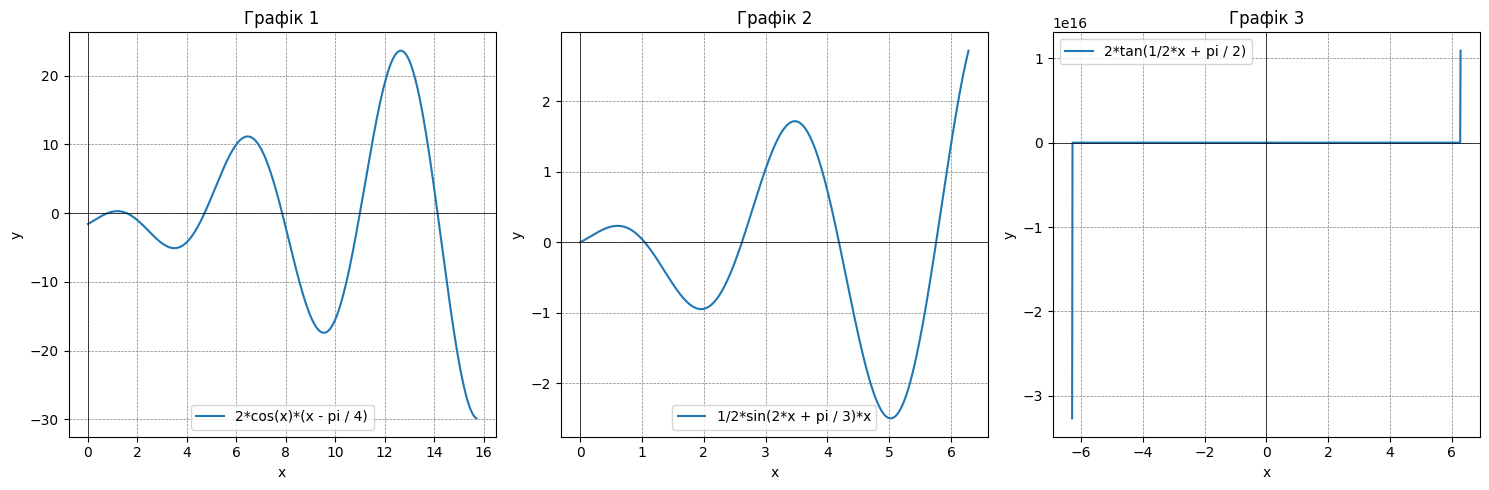

In [62]:
# Задаємо діапазон значень x
x1 = np.linspace(0, 5 * np.pi, 1000)
x2 = np.linspace(0, 2 * np.pi, 1000)
x3 = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

# Обчислюємо значення функцій
y1 = 2 * np.cos(x1) * (x1 - np.pi / 4)
y2 = 1/2 * np.sin(2 * x2 + np.pi / 3) * x2
y3 = 2 * np.tan(1/2 * x3 + np.pi / 2)

# Побудова графіків
plt.figure(figsize=(15, 5))

# Графік 1
plt.subplot(131)
plt.plot(x1, y1, label='2*cos(x)*(x - pi / 4)')
plt.title('Графік 1')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()

# Графік 2
plt.subplot(132)
plt.plot(x2, y2, label='1/2*sin(2*x + pi / 3)*x')
plt.title('Графік 2')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()

# Графік 3
plt.subplot(133)
plt.plot(x3, y3, label='2*tan(1/2*x + pi / 2)')
plt.title('Графік 3')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()

plt.tight_layout()
plt.show()